## Import Necessary Libaraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

The dataset contains the details of Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others.

The dataset contains columns are:-

 * age: age of primary beneficiary
 * sex: insurance contractor gender, female, male
 * bmi: Body mass index, providing an understanding of body, weights that are relatively high or low      relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to          weight, ideally 18.5 to 24.9.
 * children: Number of children covered by health insurance / Number of dependents
 * smoker: Smoking
 * region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
 * charges: Individual medical costs billed by health insurance
 
Predict : Can you accurately predict insurance costs?

## Importing dataset

In [2]:
# Import csv file to dataframe
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Based on certain input features such as age,sex, bmi,no of dependents ,smoker ,region  medical insurance is calculated. which bmi is continuous columns and others are categorical columns and "charges" is continuous column.

# Data Preprocessing

## Data Cleaning

In [3]:
# Checking the dimesnions of the dataset
df.shape

(1338, 7)

This dataset contains 1338 rows and 7 columns. Out of which 1 is target variable and remaining 6 are independent variables.

In [4]:
# Checking the columns of the dataset into the list format
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [5]:
# Checking the dtypes of the columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The dataset contains columns which datatypes is int64,float64 and object.

In [6]:
# Checking null values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In this dataset there are no null values present in this dataset.

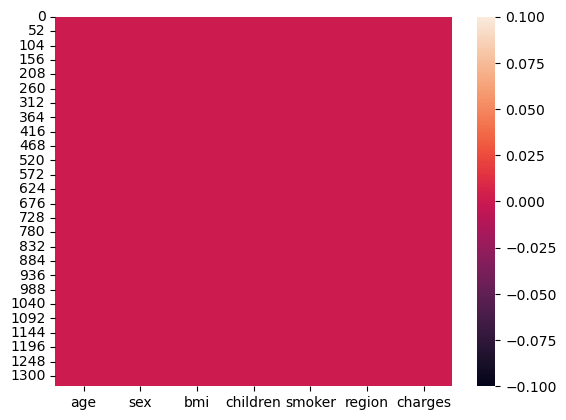

In [7]:
# Let's visualize it using heatmap
sns.heatmap(df.isnull())
plt.show()

And we can clearly visualize that there is no missing datas present.

In [8]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This gives the information about the dataset which includes indexing type,columns type, no null values and memory usage.

In [9]:
# Checking the duplicates values
df.duplicated().sum()

1

This dataset has one duplicated value. We can remove it.

In [10]:
df = df.drop_duplicates()

In [11]:
# Checking the duplicates value again
df.duplicated().sum()

0

It seems they have no duplicate values in the dataset.

In [12]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      675
female    662
Name: count, dtype: int64


bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64


children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1063
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


charges
16884.92400    1
2117.33885     1
2221.56445   

It seems that all the columns has prefect.

In [13]:
# Checking the unqiue values of each columns
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


It seem also prefect nothing looks like harmful for the model building.

In [14]:
# Checking the target columns
df["charges"].value_counts()

charges
16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

There are continuous values present in the target variables. That it has a regression problem.

In [15]:
# Spearting Numerical and Categorical columns

# Categorical columns
categorical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
        
print("Categorical columns : ",categorical_col)
print('\n')  

# Numerical columns
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
        
print("Numerical columns :",numerical_col)

Categorical columns :  ['sex', 'smoker', 'region']


Numerical columns : ['age', 'bmi', 'children', 'charges']


## Description of Dataset

In [16]:
# Statistical summary of the numerical columns.
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


This gives the statistical information of the numerical columns. The summary of the dataset looking prefect since there is no negative/invalid values present.

From the above description we can observe the following:-
    
   1. The counts of all the columns are same which means there are no missing values in the dataset.
   2. By summarizing the data we can observe there is prefect.

## Data Visualization

### Univariate Analysis

sex
male      675
female    662
Name: count, dtype: int64


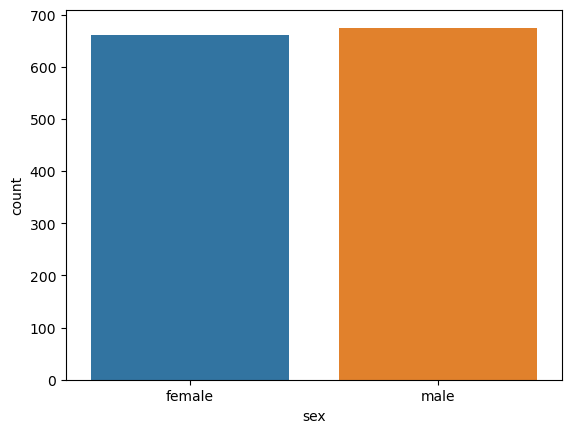

In [17]:
# Visualize the count of sex columns
print(df['sex'].value_counts())
sns.countplot(x = 'sex', data=df)
plt.show()

From the plot we can observe that the total number of male and female are almost same.

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


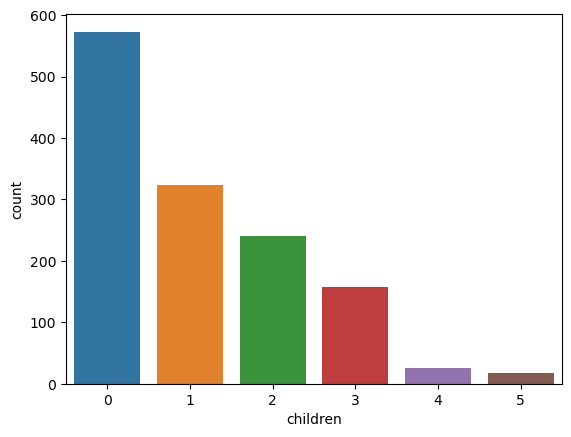

In [18]:
# Visualizing the count of childern
print(df['children'].value_counts())
sns.countplot(x = 'children', data=df)
plt.show()

From the plot we can observe that people they have not have any child have high and frequency than number of childern is incerasing than frequency is descring.

smoker
no     1063
yes     274
Name: count, dtype: int64


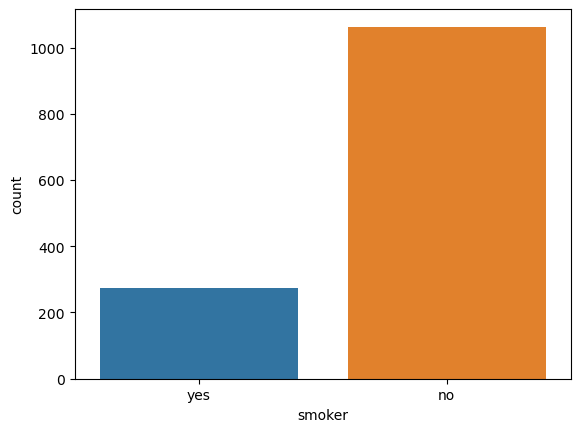

In [19]:
# Visualizing the count of smoker
print(df['smoker'].value_counts())
sns.countplot(x = 'smoker',data=df)
plt.show()

From the plot we can observe the people which can smoke is very less than people which cannot smoke.

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


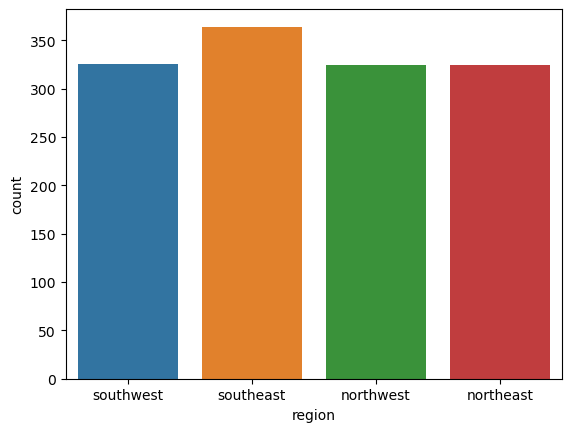

In [20]:
# Visualize the count of region
print(df['region'].value_counts())
sns.countplot(x='region',data=df)
plt.show()

From the plot we can observe the count of all the region almost same.

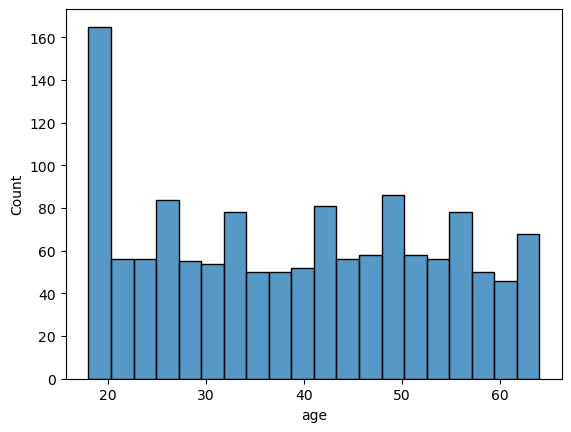

In [21]:
# Let's check how the data has been distributed numerical columns
sns.histplot(df['age'],bins=20)
plt.show()

From the above hist plots. We can obseve that they age has below 20 has high frequency. 

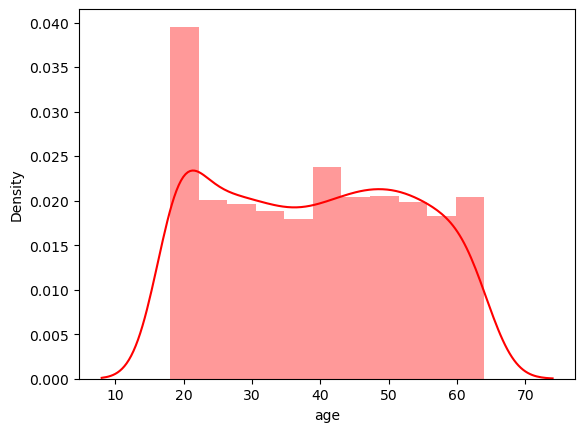

In [22]:
# Let's check how the data has been distributed in age columns
sns.distplot(df['age'],color='r')
plt.show()

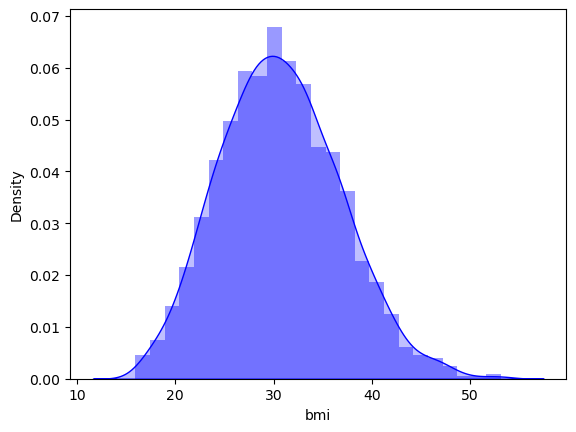

In [23]:
# Let's check how the data has been distributed in bmi columns
sns.distplot(df['bmi'],kde_kws={"shade":True},color='b')
plt.show()


From the above distribution plots. We can observer bmi colums has noraml distributed and its has bell shape curved.

### Bivariate Analysis

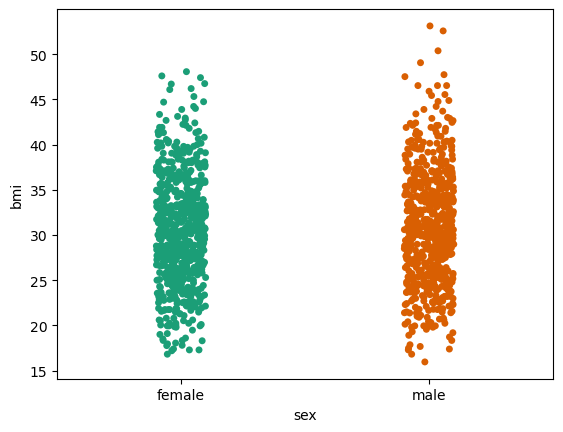

In [24]:
# Comparing sex and bmi
sns.stripplot(x='sex',y='bmi',data=df,palette='Dark2')
plt.show()

There is not significatnt between the features, here both the features are in equal length.

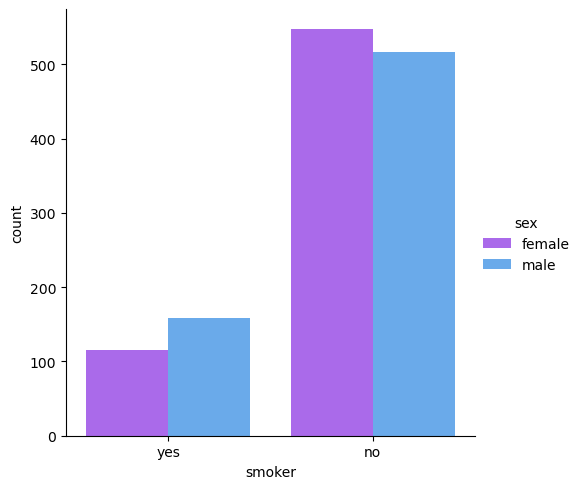

In [25]:
# Comparing sex and age
sns.catplot(x='smoker',hue='sex',data=df,palette='cool_r',kind='count')
plt.show()

We can observe there is no signficant difference in the sex, here both the male and female are equal smoker.

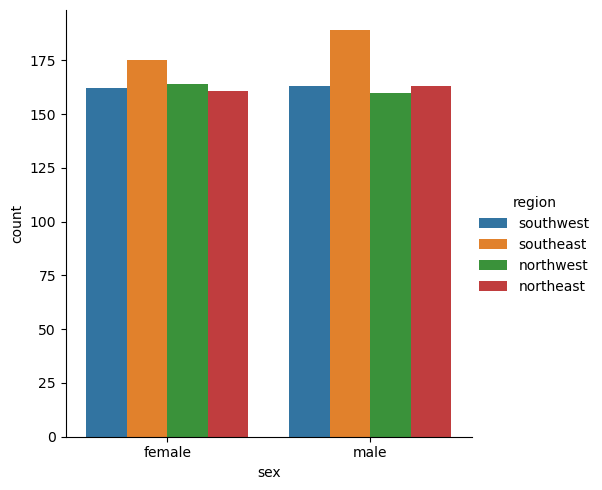

In [26]:
# Comparing sex and children
sns.catplot(x='sex',hue='region',data=df,kind='count')

We can observe there is no signficant difference in the sex, here both the male and female are equal all region.

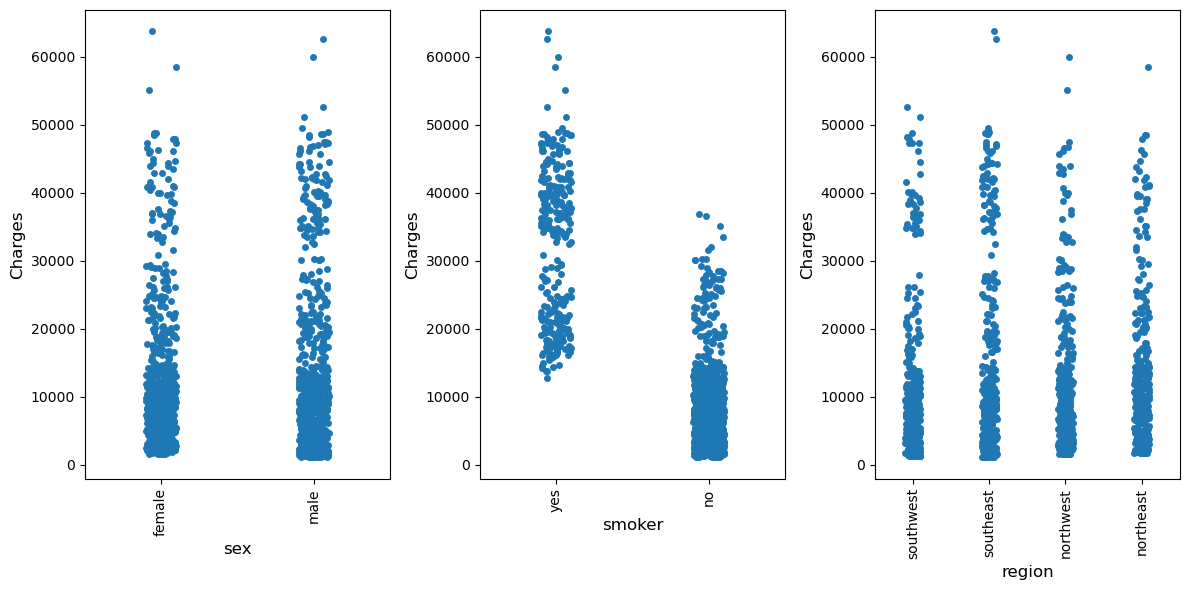

In [27]:
# Let's checking features vs target
plt.figure(figsize=(12,6),facecolor='white')
plotnumber = 1

for col in categorical_col:
    if plotnumber<=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.stripplot(x=col,y='charges',data=df)
        plt.xlabel(col,fontsize=12)
        plt.ylabel('Charges',fontsize=12)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

 1. In the first plot we can see there is no signficant difference in the genders, both the genders have equal charges.
 2. In second plot we can see there is significatnt between the smokers, here smoker have high charges but no smoker has less charges.
 3. in the last plot we can see there is no signficant differene in the region. All region have same charges.

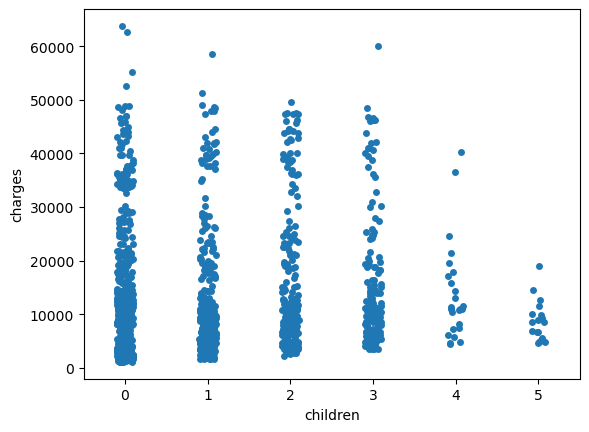

In [28]:
# Comparing Changes and children
sns.stripplot(x='children',y='charges',data=df)
plt.show()

We can observe that those have they no child have high charges and child are increasing than the charges are decreasing

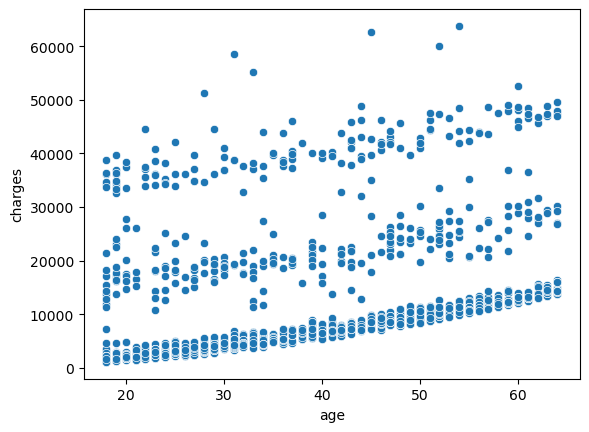

In [29]:
# Let's visualize between bmi vs charges by using scatterplot
sns.scatterplot(x='age',y='charges',data=df,palette='Dark2')
plt.show()

### Multivariate Analysis

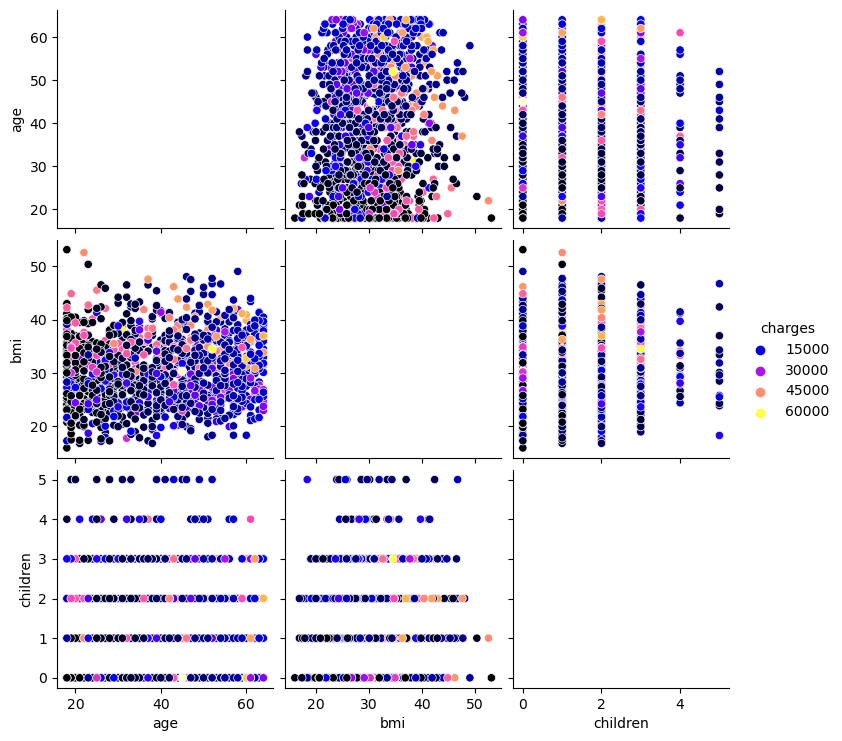

In [30]:
# Plot pair plot
sns.pairplot(df,hue='charges',palette='gnuplot2')
plt.show()

 1. The pairplot gives the pairwise relation between the features on the basis of the target "Charges".
 2. There are no outliers in any of the columns buyt let's plot boxplot to the identify the outliers.

## Checking for outliers

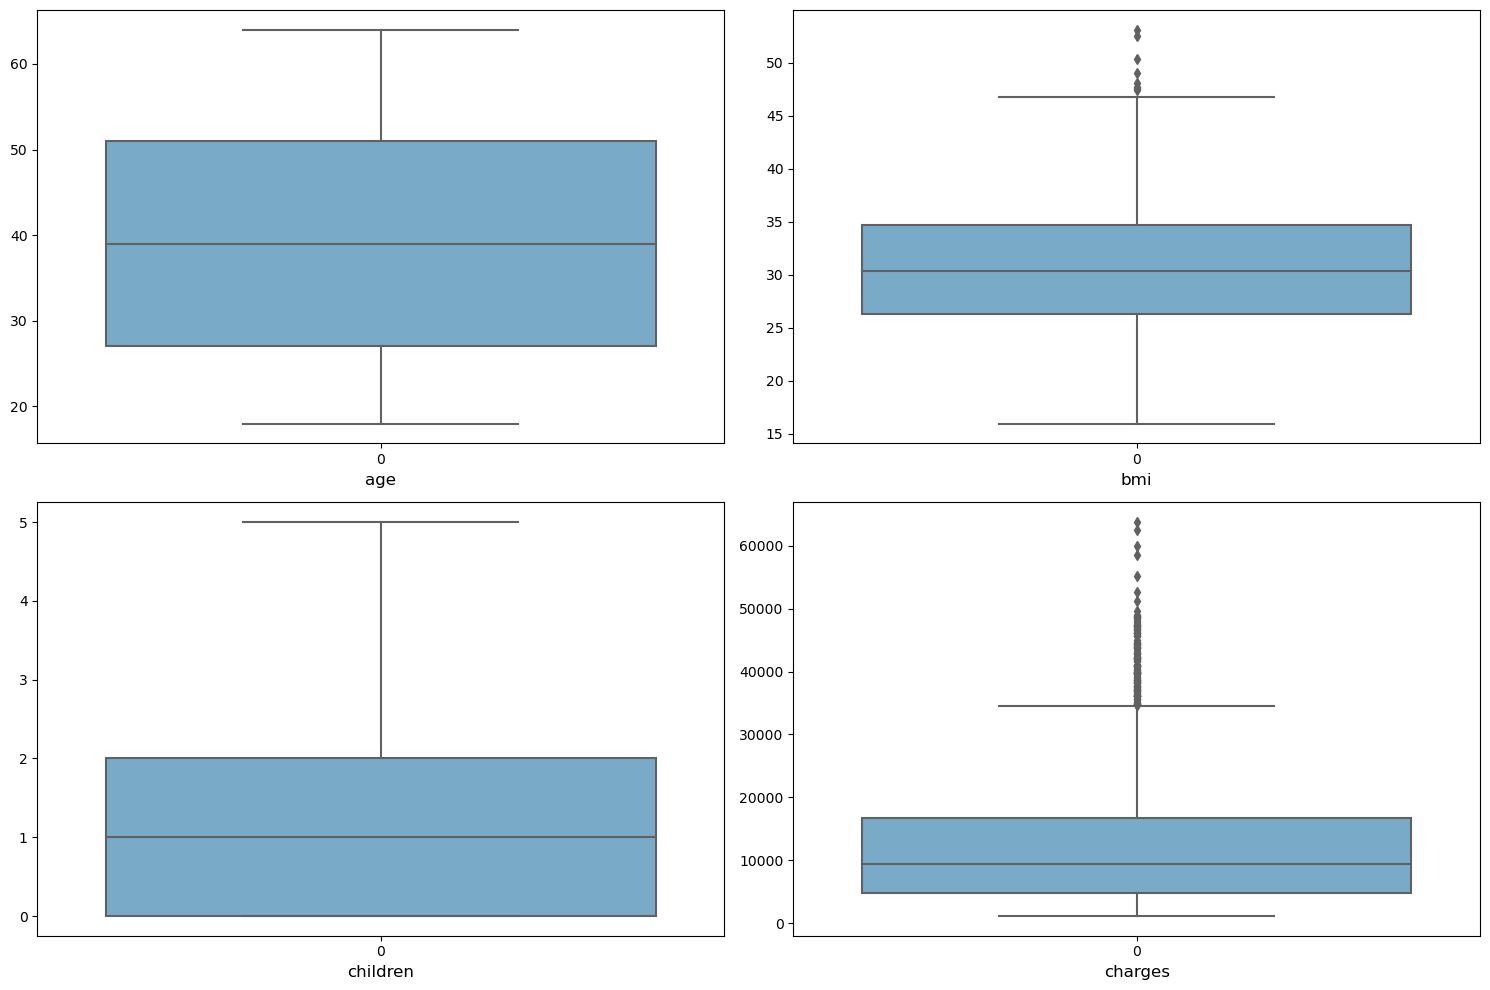

In [31]:
# Let's chekc the outliers by plotign boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber = 1

for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette='Blues_r')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

The columns children has categorical that we do not to check outliers and charges columns is target variables so we can ignore it. So we have found the outliers in "bmi" columns.

So, removing the outliers using zscore and IQR techniques before building the model and selected best one.

## Checking the outliers using zscore method

In [32]:
from scipy.stats import zscore

df_feature = df[['bmi']]
z = np.abs(zscore(df_feature))
z

,bmi
0,0.453160
1,0.509422
2,0.383155
3,1.305052
4,0.292456
...,...
1333,0.050269
1334,0.206053
1335,1.014490
1336,0.797524


In [33]:
# Thresholds = 3
np.where(z>3)

(array([ 116,  846, 1046, 1316], dtype=int64),
 array([0, 0, 0, 0], dtype=int64))

In [34]:
df.iloc[116]

age                 58
sex               male
bmi              49.06
children             0
smoker              no
region       southeast
charges     11381.3254
Name: 116, dtype: object

In [35]:
# Now we will removing the data above zscore and creating new DF
df1 = df[(z<3).all(axis=1)]

df1.shape

(1333, 7)

In [36]:
# Shape of the old dataframe and new dataframe
print("Old DataFrame :",df.shape[0])
print("New DataFrame :",df1.shape[0])

Old DataFrame : 1337
New DataFrame : 1333


In [37]:
print("Data Loss Percentage After Removing the outliers with zscore method -\n",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage After Removing the outliers with zscore method -
 0.2991772625280479


In [38]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Checking the outliers using IQR method

In [39]:
# 1st quantile
Q1 = df_feature.quantile(0.25)

# 3rd quantile
Q3 = df_feature.quantile(0.75)

# IQR
IQR = Q3 - Q1

df2 = df[~((df_feature<(Q1 - 1.5 * IQR)) |(df_feature>(Q3 + 1.5 * IQR))).any(axis=1)]

In [40]:
df2.shape

(1328, 7)

In [41]:
# Shape of the old dataframe and new dataframe
print("Old DataFrame :",df.shape[0])
print("New DataFrame :",df2.shape[0])

Old DataFrame : 1337
New DataFrame : 1328


In [42]:
print("Data Loss Percentage After removing outliers with IQR method - \n",((df.shape[0] - df2.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing outliers with IQR method - 
 0.6731488406881078


We use zscore method because with zscore we loss less data then IQR methods

In [43]:
## Treating Outliers with zscore
df = df1  

In [44]:
# After remvoing the outliers the dimension of the dataset
df.shape

(1333, 7)

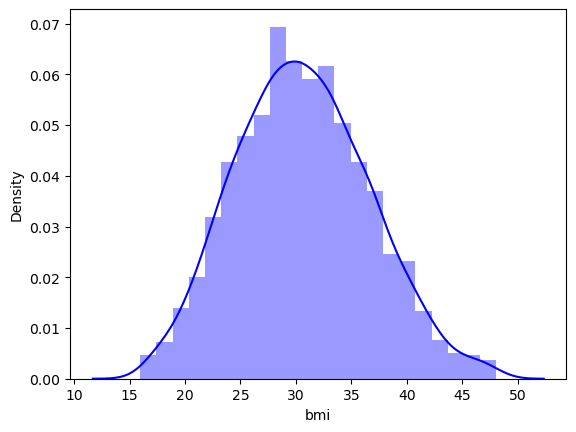

In [45]:
# Let's see how the data has distributed in "bmi" column
sns.distplot(df['bmi'],color='b')
plt.show()

From the above distribution plots we can notice that the data almost looks normal 

## Checking the skewness

In [46]:
df['age'].skew()

0.05271357851291751

In [47]:
df['bmi'].skew()

0.2055411793073411

It seems no skewness.

## Encoding categorical columns

In [48]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [49]:
df.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region      float64
charges     float64
dtype: object

We have converted the categorical columns into numerical columns using OrdinalEncoding method.

## Correlation between label and features.

In [50]:
# Checking the correlatoin between features and the target
corr = df.corr()

corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.017987,0.118978,0.041406,-0.024390,0.002473,0.300658
sex,-0.017987,1.000000,0.037046,0.019357,0.076510,0.003641,0.057923
bmi,0.118978,0.037046,1.000000,0.018058,0.002264,0.155889,0.200868
children,0.041406,0.019357,0.018058,1.000000,0.006744,0.016924,0.066957
smoker,-0.024390,0.076510,0.002264,0.006744,1.000000,-0.002510,0.786519
region,0.002473,0.003641,0.155889,0.016924,-0.002510,1.000000,-0.006743
charges,0.300658,0.057923,0.200868,0.066957,0.786519,-0.006743,1.000000


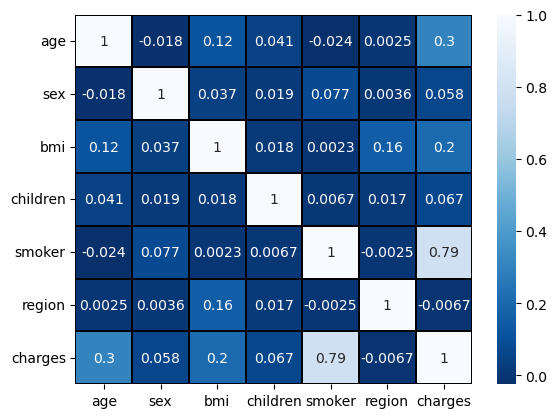

In [51]:
# Visualizing the correlation matrix by ploting heatmap
sns.heatmap(df.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='.2g',cmap='Blues_r')
plt.show()

this heatmap show the correlation matrix by visualizing the data. We can observe the relatoin between feature to feature and feature to label.

Positive correlation :-
   1. Postive correlaion between smoker and target columns.

Negative correlation :-

   1. Almost prefect we seems there is no high negative correlation.

In [52]:
# Checking correlation between feature to target
corr['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.786519
age         0.300658
bmi         0.200868
children    0.066957
sex         0.057923
region     -0.006743
Name: charges, dtype: float64

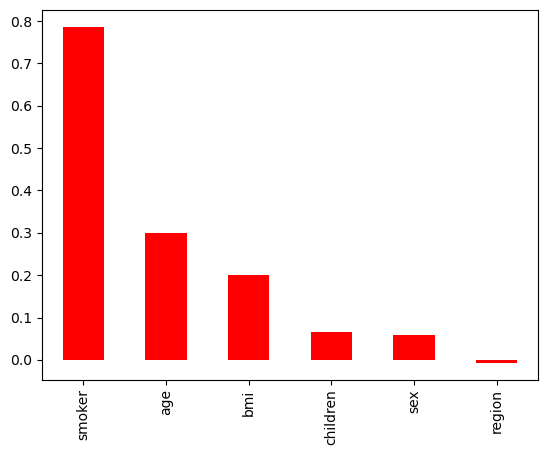

In [53]:
# Visualizing the correlation between target and features using barplot
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='r')
plt.show()

We can observe the positve correlation between target vs all features using barplot. And smoke has high positve correlation.

## Sperating features and target

In [54]:
x = df.drop('charges',axis=1)
y = df['charges']

## Feature Scaling using Standard Scalarization

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.443917,-1.006775,-0.450191,-0.909922,1.970478,1.342851
1,-1.515225,0.993271,0.527991,-0.080854,-0.507491,0.438800
2,-0.802147,0.993271,0.399678,1.577282,-0.507491,0.438800
3,-0.445607,0.993271,-1.315891,-0.909922,-0.507491,-0.465250
4,-0.516915,0.993271,-0.286883,-0.909922,-0.507491,-0.465250
...,...,...,...,...,...,...
1328,0.766626,0.993271,0.061396,1.577282,-0.507491,-0.465250
1329,-1.515225,-1.006775,0.219705,-0.909922,-0.507491,-1.369301
1330,-1.515225,-1.006775,1.041245,-0.909922,-0.507491,0.438800
1331,-1.301302,-1.006775,-0.800137,-0.909922,-0.507491,1.342851


We have scaled the data using Standard Scalaization method to overcome the issue of biasness.

## Checking Variance Inflaton Factor (VIF)

In [56]:
# Find the variance inflation factor in each scaled column i.e. x.shap[0] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

,VIF,VIF values
0,age,1.017356
1,sex,1.008073
2,bmi,1.041622
3,children,1.002544
4,smoker,1.006479
5,region,1.025430


By checking VIF values we cannot find any mutlicollineraity problem. We can now move ahead for model building.

# Modelling 

In [57]:
# Import necessary libaraies use for model building

# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor, BaggingRegressor
import xgboost as xgb
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Find the best random state

In [58]:
# Find the best random state
maxAccu = 0
maxRS = 0

for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
    
print("Best accuracy is ", maxAccu,"at random_state", maxRS)     

Best accuracy is  0.802515124059242 at random_state 337


## Build a function to check best algrothim

In [59]:
# Create a function to check r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_erro

def regressor(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=maxRS)
    
    # Train the model
    model.fit(x_train,y_train)
    
    # Predict the model on train set
    train_pred = model.predict(x_train)
    
    # Predict the model on test set
    pred = model.predict(x_test)
    
    # Checkingthe r2_score on train set
    r2_train = r2_score(y_train,train_pred)*100
    print("R2_Score on training data :",r2_train)
    
    # Check the r2_score on test data
    r2_test = r2_score(y_test,pred)*100
    print("R2_Score on testing data  :",r2_test)
    
    # Checking Mean Absolute Error
    mae = mean_absolute_error(y_test,pred)
    print("Mean Absolute Error       :",mae)
    
    # Checking Mean Squared Error
    mse = mean_squared_error(y_test,pred)
    print("Mean Squared Error        :",mse)
    
    # Checking Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    print("Mean Squared Error        :",rmse)
    
    # Checking Cross Validation Score
    cv = (cross_val_score(model,x,y,cv=10))
    print("Cross Validation Score    :",cv)
    print("Cross Validation Score    :",cv.mean()*100)
    
    # Differet between R2 Score and Cross Validation Score
    print("\nDifference between R2_score and Cross Validaton Score\n",r2_test-cv.mean()*100)
    
    # Visualize Actual Predict vs Model predict
    plt.figure(figsize=(6,4))
    plt.scatter(x=pred, y=y_test,color='r')
    plt.plot(pred, pred, color = 'b')
    plt.xlabel('Predicted ',fontsize=14)
    plt.ylabel('Actual ', fontsize=14)
    plt.title(model,fontsize=18)
    plt.show()

## LinearRegression

R2_Score on training data : 72.66770803942535
R2_Score on testing data  : 80.2515124059242
Mean Absolute Error       : 3813.178199272492
Mean Squared Error        : 29705660.25561218
Mean Squared Error        : 5450.289923995987
Cross Validation Score    : [0.78865428 0.73104377 0.73430685 0.6727131  0.76999352 0.77707481
 0.79780689 0.65956032 0.74520416 0.76131389]
Cross Validation Score    : 74.37671596607406

Difference between R2_score and Cross Validaton Score
 5.874796439850144


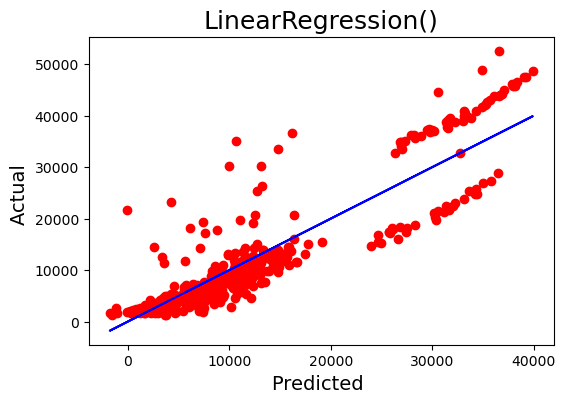

In [60]:
LR = LinearRegression()

regressor(LR,x,y)

## Lasso Regression

R2_Score on training data : 72.66770371426834
R2_Score on testing data  : 80.2510650008398
Mean Absolute Error       : 3813.036822507043
Mean Squared Error        : 29706333.242005195
Mean Squared Error        : 5450.351662232923
Cross Validation Score    : [0.78866269 0.73104682 0.73433507 0.67276294 0.76996589 0.77706669
 0.79779414 0.65958422 0.74522067 0.76130842]
Cross Validation Score    : 74.37747524079971

Difference between R2_score and Cross Validaton Score
 5.87358976004009


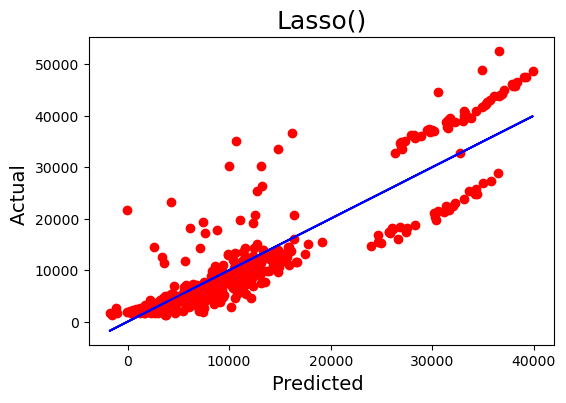

In [61]:
lasso = Lasso()

regressor(lasso,x,y)

## Ridge Regression

R2_Score on training data : 72.6676228810027
R2_Score on testing data  : 80.24250754928096
Mean Absolute Error       : 3815.0205484771745
Mean Squared Error        : 29719205.354234044
Mean Squared Error        : 5451.532385874089
Cross Validation Score    : [0.78861738 0.7310979  0.73432424 0.67287409 0.76983382 0.77707583
 0.79774642 0.65971942 0.74519031 0.76128643]
Cross Validation Score    : 74.37765853503247

Difference between R2_score and Cross Validaton Score
 5.864849014248492


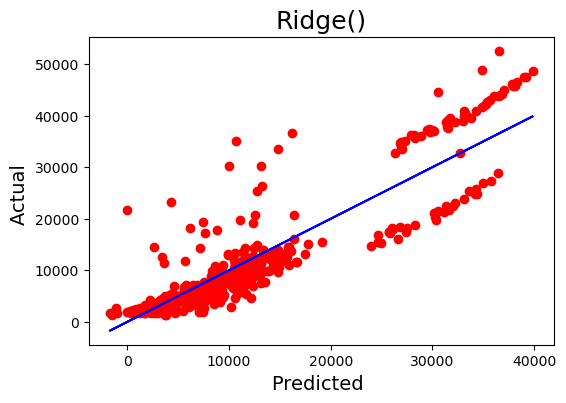

In [62]:
ridge = Ridge()

regressor(ridge,x,y)

## KNeighborsRegressor

R2_Score on training data : 85.48823652093121
R2_Score on testing data  : 85.3351048607902
Mean Absolute Error       : 3004.0785812439995
Mean Squared Error        : 22058924.29049739
Mean Squared Error        : 4696.6929099630715
Cross Validation Score    : [0.84653398 0.80937386 0.78956201 0.70957401 0.81527597 0.85664453
 0.83113612 0.77853467 0.82846619 0.80179111]
Cross Validation Score    : 80.66892459116504

Difference between R2_score and Cross Validaton Score
 4.666180269625158


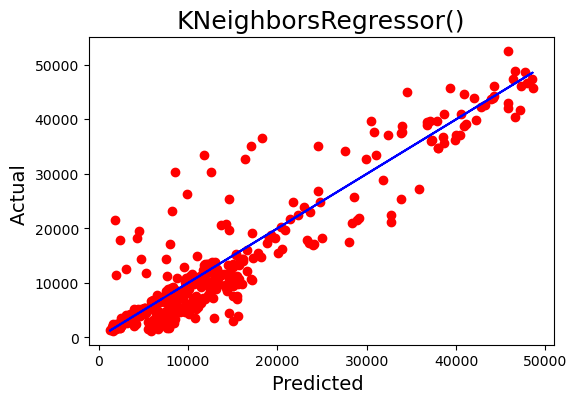

In [63]:
KNN = KNeighborsRegressor()

regressor(KNN,x,y)

## DecisionTreeRegressor

R2_Score on training data : 99.80572826431846
R2_Score on testing data  : 76.42367911409359
Mean Absolute Error       : 2715.3354440499998
Mean Squared Error        : 35463484.22773003
Mean Squared Error        : 5955.122519959605
Cross Validation Score    : [0.79019107 0.69397191 0.66231319 0.53595068 0.76848723 0.71730097
 0.72958385 0.61820514 0.70506751 0.69195401]
Cross Validation Score    : 69.13025569420694

Difference between R2_score and Cross Validaton Score
 7.2934234198866505


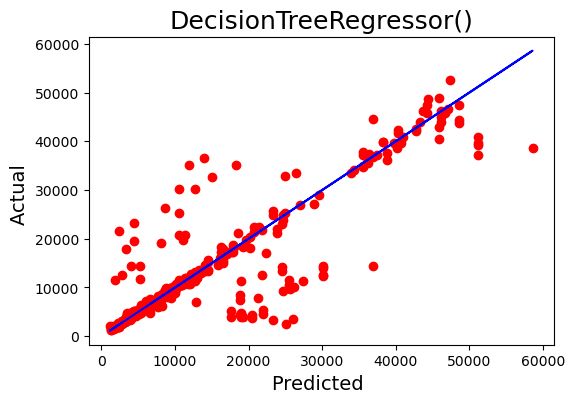

In [64]:
DT = DecisionTreeRegressor()

regressor(DT,x,y)

## RandomForestRegressor

R2_Score on training data : 97.25461517002518
R2_Score on testing data  : 87.32847565295904
Mean Absolute Error       : 2541.364601277607
Mean Squared Error        : 19060497.43712195
Mean Squared Error        : 4365.832960286267
Cross Validation Score    : [0.86935016 0.83463597 0.82136031 0.71559518 0.85544383 0.88364953
 0.84748097 0.77821    0.8476716  0.86485287]
Cross Validation Score    : 83.18250415309588

Difference between R2_score and Cross Validaton Score
 4.145971499863165


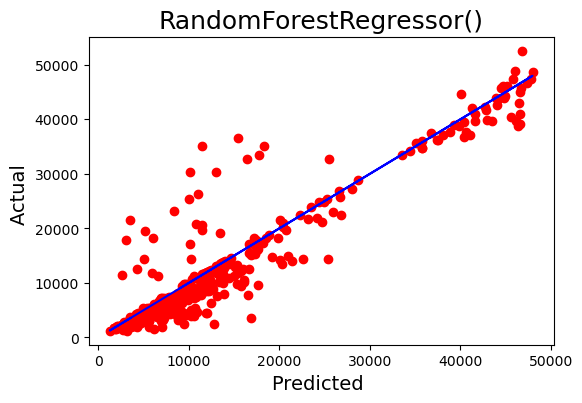

In [65]:
RFR = RandomForestRegressor()

regressor(RFR,x,y)

## ExtraTreesRegressor

R2_Score on training data : 99.80572826431846
R2_Score on testing data  : 85.7325062965158
Mean Absolute Error       : 2524.4364907983486
Mean Squared Error        : 21461153.348367203
Mean Squared Error        : 4632.618411694104
Cross Validation Score    : [0.86060909 0.8014034  0.81798353 0.67916679 0.82581354 0.86541308
 0.84862779 0.76638613 0.84144626 0.83615061]
Cross Validation Score    : 81.43000213904749

Difference between R2_score and Cross Validaton Score
 4.302504157468306


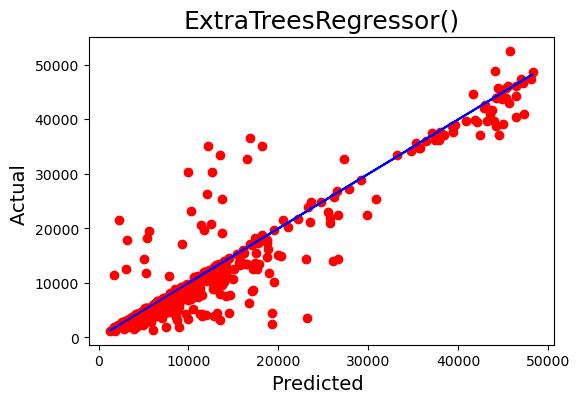

In [66]:
ETR = ExtraTreesRegressor()

regressor(ETR,x,y)

## GradientBoostingRegressor

R2_Score on training data : 89.22299827186727
R2_Score on testing data  : 89.43225538120332
Mean Absolute Error       : 2357.1918879436994
Mean Squared Error        : 15895993.544752216
Mean Squared Error        : 3986.977996522205
Cross Validation Score    : [0.88731759 0.86747831 0.8415772  0.74952616 0.86337244 0.92288147
 0.88053562 0.81006129 0.85910944 0.86422473]
Cross Validation Score    : 85.46084264879467

Difference between R2_score and Cross Validaton Score
 3.971412732408652


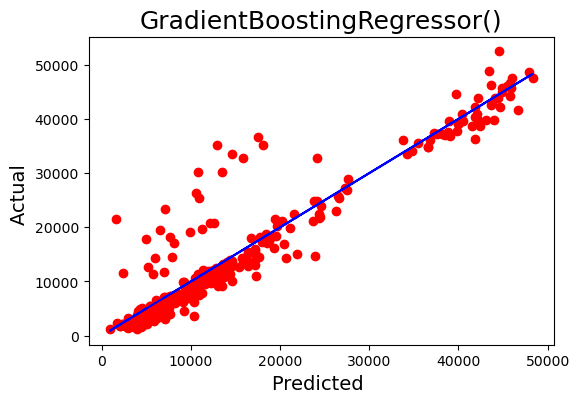

In [67]:
GBR = GradientBoostingRegressor()

regressor(GBR,x,y)

## AdaBoostRegressor

R2_Score on training data : 81.79788375565519
R2_Score on testing data  : 86.04815590543599
Mean Absolute Error       : 3583.628832248054
Mean Squared Error        : 20986353.44291959
Mean Squared Error        : 4581.086491534469
Cross Validation Score    : [0.84683591 0.82586324 0.81477561 0.7031471  0.84559464 0.8426657
 0.84070052 0.77628991 0.80454653 0.84749059]
Cross Validation Score    : 81.47909751023471

Difference between R2_score and Cross Validaton Score
 4.5690583952012815


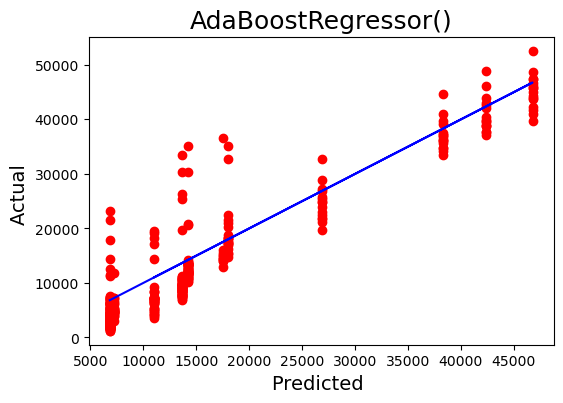

In [68]:
ABR = AdaBoostRegressor()

regressor(ABR,x,y)

## BaggingClassifier

R2_Score on training data : 96.76038076630647
R2_Score on testing data  : 86.31841003257719
Mean Absolute Error       : 2573.947526352
Mean Squared Error        : 20579837.387181636
Mean Squared Error        : 4536.500566205369
Cross Validation Score    : [0.8655662  0.81973035 0.81663727 0.70853541 0.83980155 0.89368524
 0.84619555 0.77996271 0.82645092 0.84483982]
Cross Validation Score    : 82.41405018715125

Difference between R2_score and Cross Validaton Score
 3.904359845425944


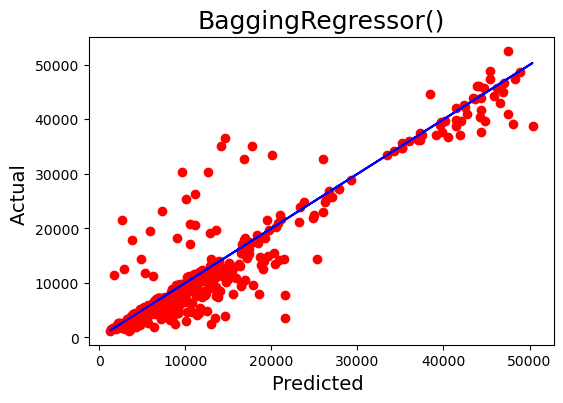

In [69]:
BCR = BaggingRegressor()

regressor(BCR,x,y)

R2_Score on training data : 99.4441815509766
R2_Score on testing data  : 84.6993974887767
Mean Absolute Error       : 2904.2067927973026
Mean Squared Error        : 23015154.843599893
Mean Squared Error        : 4797.411264796869
Cross Validation Score    : [0.84073258 0.8151123  0.76244579 0.66892924 0.84203231 0.86344123
 0.85054905 0.7575106  0.77463426 0.85155695]
Cross Validation Score    : 80.26944308429556

Difference between R2_score and Cross Validaton Score
 4.429954404481137


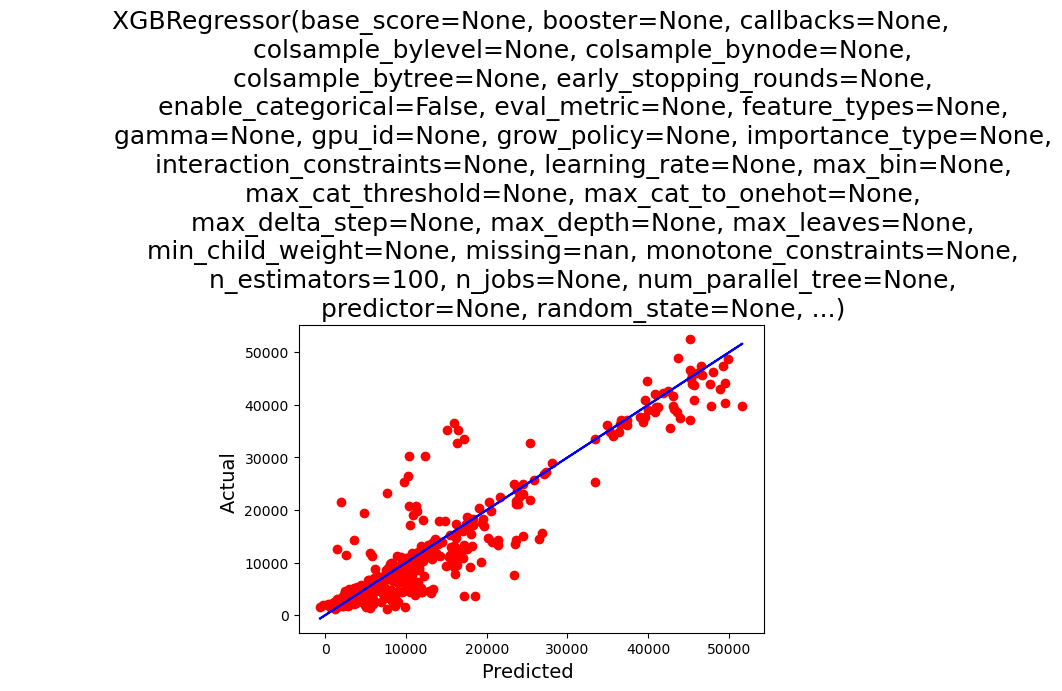

In [70]:
XGB = xgb.XGBRegressor()

regressor(XGB,x,y)

## Support Vactor Machine

R2_Score on training data : -8.943723609444287
R2_Score on testing data  : -7.77452490419861
Mean Absolute Error       : 8397.449873722195
Mean Squared Error        : 162114359.68263894
Mean Squared Error        : 12732.41374141757
Cross Validation Score    : [-0.12265952 -0.09372635 -0.14793813 -0.06236837 -0.10607937 -0.04585572
 -0.08102868 -0.12917186 -0.10754362 -0.10196822]
Cross Validation Score    : -9.983398499991251

Difference between R2_score and Cross Validaton Score
 2.2088735957926415


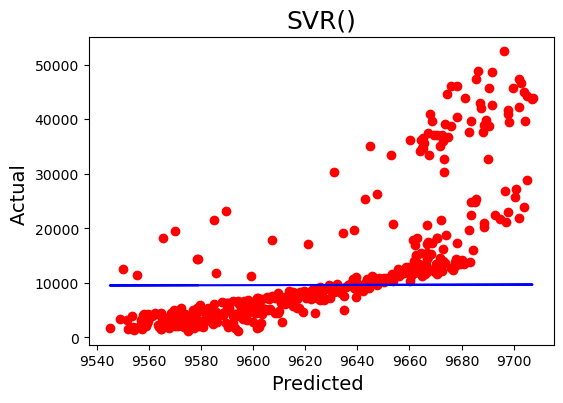

In [71]:
svr = SVR()

regressor(svr,x,y)

From the difference of both R2 score and Cross Validation score computed on R2 score we can conclude that Ridge Regression as out best fitting and best performing model.

## BaggingRregressor and XGBRegressor is out best model

## Hyper Parameter Turning

### Tune the parameter with BaggingRegressor

In [98]:
# Check parameter for hyper parater tuning
BCR.get_params().keys()

dict_keys(['base_estimator', 'bootstrap', 'bootstrap_features', 'estimator', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [101]:
# We are tuning four important hyperparamters right now. We are passing different values for both parameters
from sklearn.model_selection import GridSearchCV


params = {'bootstrap': range(2,8,2),
        'max_samples': range(2,12,2),
        'n_estimators':[47,50,60,70],
        }

# Train the model for best parameters
GCV = GridSearchCV(BCR,param_grid=params)
GCV.fit(x_train,y_train)

print('Best Score     -->',(GCV.best_score_))

print('Best Parameter -->',(GCV.best_estimator_))

Best Score     --> 0.6566024317334955
Best Parameter --> BaggingRegressor(bootstrap=4, max_samples=10, n_estimators=70)


R2_score                : 81.92369987604259
Mean Absolute Error     : 3129.7622852286
Mean Squared Error      : 27841023.242744662
Root Mean Squared Error : 5276.459347208567


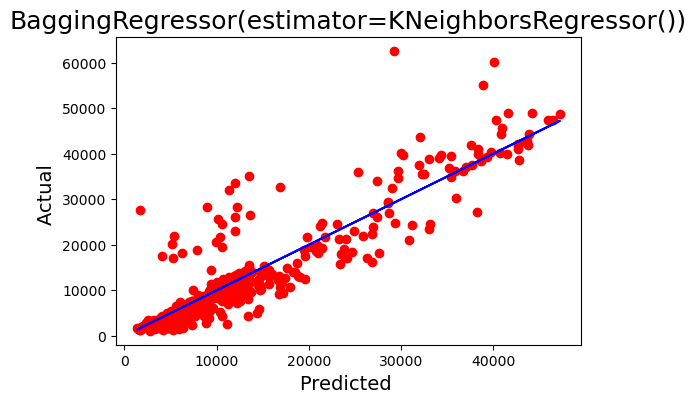

In [118]:
# Instantiate DecisionTreeClassifier with new parameters and train 

ModelBR =  BaggingRegressor(KNeighborsRegressor(n_neighbors=5))

ModelBR.fit(x_train,y_train)
pred = ModelBR.predict(x_test)
print('R2_score                :',r2_score(y_test,pred)*100)
print('Mean Absolute Error     :',mean_absolute_error(y_test,pred))
print('Mean Squared Error      :',mean_squared_error(y_test,pred))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,pred)))

# visualize actual predict or model predict
plt.figure(figsize=(6,4))
plt.scatter(x=pred, y=y_test,color='r')
plt.plot(pred, pred, color = 'b')
plt.xlabel('Predicted ',fontsize=14)
plt.ylabel('Actual ', fontsize=14)
plt.title(ModelBR,fontsize=18)
plt.show()

### Tune the parameter with XGBRegressor

In [111]:
XGB.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [112]:
# We are tuning four important hyperparamters right now. We are passing different values for both parameters

params = {'n_estimators':[47,50,60,70], 
          'learning_rate':[0.09,0.25,0.30],
          'random_state': [10,50,1000],
          'n_jobs': [-2, -1. -1],
          'max_depth': [0, 10, 20]
        }

# Train the model for best parameters
GCV = GridSearchCV(XGB,param_grid=params)
GCV.fit(x_train,y_train)

print('Best Score     -->',(GCV.best_score_))

print('Best Parameter -->',(GCV.best_estimator_))

Best Score     --> 0.7793979302524056
Best Parameter --> XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=47, n_jobs=-2, num_parallel_tree=None, predictor=None,
             random_state=10, ...)


R2_score                : 85.08023895938224
Mean Absolute Error     : 2433.0075438280273
Mean Squared Error      : 22979338.197505902
Root Mean Squared Error : 4793.676897487554


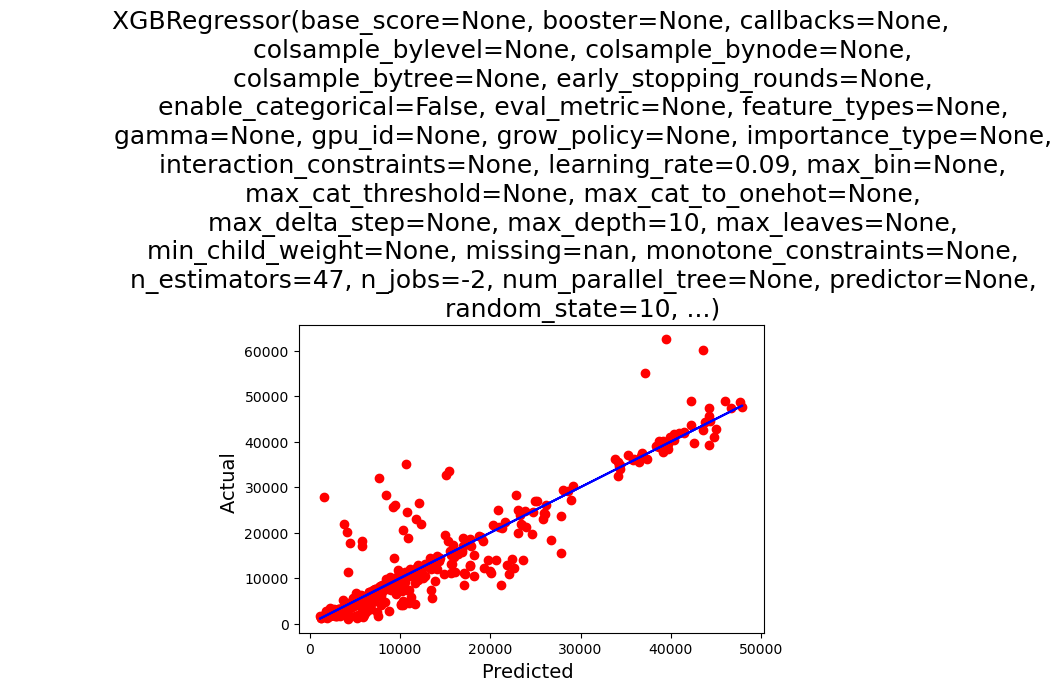

In [123]:
# Instantiate XGBRegressor with new parameters and train 

ModelXGB = GCV.best_estimator_
        
ModelXGB.fit(x_train,y_train)
pred = ModelXGB.predict(x_test)
print('R2_score                :',r2_score(y_test,pred)*100)
print('Mean Absolute Error     :',mean_absolute_error(y_test,pred))
print('Mean Squared Error      :',mean_squared_error(y_test,pred))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,pred)))

# visualize actual predict or model predict
plt.figure(figsize=(6,4))
plt.scatter(x=pred, y=y_test,color='r')
plt.plot(pred, pred, color = 'b')
plt.xlabel('Predicted ',fontsize=14)
plt.ylabel('Actual ', fontsize=14)
plt.title(ModelXGB,fontsize=18)
plt.show()

### The performance of XGBRegressor is better than BaggingRegressor

In [124]:
import joblib
joblib.dump(ModelXGB,"MedialCostInsurance.pkl")

['MedialCostInsurance.pkl']

In [125]:
loaded_model = joblib.load(open('MedialCostInsurance.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

85.08023895938224


In [126]:
conculsion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conculsion

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Predicted,6238.745117,23793.896484,34151.765625,7418.433594,1828.237793,3825.188232,17084.5625,9351.655273,10203.975586,9269.229492,...,2739.828369,5824.44873,1984.513184,2233.459717,6418.048828,9699.674805,39662.648438,9803.038086,21219.714844,10763.72168
Original,6185.320800,24667.419000,32548.340500,6289.754900,2150.469000,21984.470610,11244.3769,9182.170000,8342.908750,25656.575260,...,2585.850650,18157.87600,2103.080000,3378.910000,3062.508250,9282.480600,39556.494500,10197.772200,8534.671800,11362.75500
